# Analyse der Server Ergebnisse:

# 1. Zusammenfassungen:

- Es scheint so, dass die Degrees of Freedom mit der Anzahl an Inputs + 1 skalieren.
- Die Anzahl an (trainierbaren) Parametern hat wenig mit den Ergebnissen zu tun.
- Die Simulationsergebnisse zu den Modellen mit anderen Optimierern stehen noch aus.
- Ein Problem besteht darin, dass die größeren Netze hier nicht richtig fitten, da ich die Simulation kleiner machen musste
  - Hoffe, dass ich eine "große" auf den Server schieben kann
- ! Relu Aktivierungsfunktionen haben keinen signifikanten Einfluss auf das Ergebnnis.


**Sind wir hier einfach in einem Linearen Modell? Was kann man noch machen um diese Vermutung zu überprüfen?**

## Simulationsbeschreibung

- Simulation von Daten auf welche Neuronale Netze gefittet werden, mit dem Ziel die Degrees of Freedom der Neuronalen Netze zu bestimmen.
- Vorgehen orientiert sich an Gao und Jojic

- Die DFs werden mit Hilfe von Finite Differences bestimmt.

____



## Aufbau der Simulationen
- Es werden verschiedene Eigenschaften der Modelle simuliert:
  - Tiefe der Netze (0, 1, 2, (3)) Hidden Layer
    - Mit einer Tiefe von drei war geplant konnte (noch) aber nicht auf dem Server simuliert werden.
  - Breite der Layer (1, 10, 20)
  - Aktivierungsfunktionen (Lineare, relu)
    - relu um eine nicht lineare und nicht komplett Differenzierbarkeit der Modelle einzuführen.
  - Anzahl der Inputs (k = 1, ..., 9)
- Die Differenz für die Finite Differences wird auch über die Modelle verändert
  - Ich nutze hierbei h (1e-3 und 1e-5)
- Der Intercept $\beta_0$ wird über den Bias modelliert.
  - Als Loss wird der MSE genutzt, da wir hier "Lineare" Modelle haben.

_____

## Der datengeneriedende Prozess

Der Datenerzeugende-Prozess orientiert sich an einem einfachen Linearen Modell:
$$
    y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + noise 
$$
- hierbei sein
  - $X \sim U(0,1)$,
  - $Noise \sim N(0,1)$
- Die Simulationen sind mit jeweils 750 Beobachtungen erstellt worden.

____

## Finite Differences

Ich benutze die folgenden Differenzen:

Forward Differences: $$ \dfrac{f(x + h) - (x)}{h} + O(h) $$
Backward Differences: $$ \dfrac{f(x) - (x - h)}{h} + O(h) $$
Centered Differences: $$ \dfrac{f(x + h) - (x - h)}{2 h} + O(h^2) $$

Die unterstellten Differenzen sind hierbei `1e-3` und `1e-5`.



# 2. Analyse der Ergebnisse

#### libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import glob

## Laden der Ergebnisse

### df_gd_h1e3_u20

In [2]:
df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u10/dfs_h0_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h0_gd_ln_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u10/dfs_forw_h1_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_ln_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u10/dfs_forw_h2_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_ln_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u10/dfs_forw_h1_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_relu_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u10/dfs_forw_h2_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_relu_u10 = df


### df_gd_h1e3_u20

In [3]:
df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u20/dfs_h0_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h0_gd_ln_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u20/dfs_forw_h1_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_ln_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u20/dfs_forw_h2_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_ln_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u20/dfs_forw_h1_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_relu_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e3_u20/dfs_forw_h2_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_relu_u20 = df


## 2.1. Nur Lineare Aktivierungsfunktionen

### Keine Hidden Layer (quasi Lineares Regressions Modell)

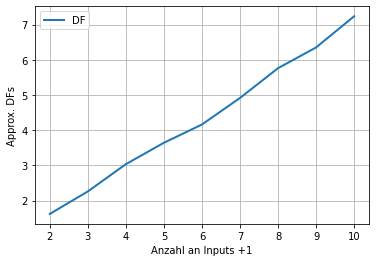

In [4]:
plt.plot(dfs_h0_gd_ln_u10.iloc[0], dfs_h0_gd_ln_u10.iloc[4], linewidth=2.0, label = 'DF')
plt.xlabel("Anzahl an Inputs +1")
plt.ylabel("Approx. DFs")
plt.grid()
plt.legend()
plt.show()


In [5]:
dfs_h0_gd_ln_u10

0         1         2         3         4  \
k (Inputs + Intercept)  2.000000  3.000000  4.000000  5.000000  6.000000   
Parameter               2.000000  3.000000  4.000000  5.000000  6.000000   
Forward Dif             1.612663  2.284288  3.073692  3.624678  4.179716   
Backward Dif            1.631498  2.236843  2.996445  3.660440  4.142284   
Centered Dif            1.622081  2.260566  3.035069  3.642559  4.161000   

                               5         6         7          8  
k (Inputs + Intercept)  7.000000  8.000000  9.000000  10.000000  
Parameter               7.000000  8.000000  9.000000  10.000000  
Forward Dif             4.971981  5.705833  6.360531   7.219315  
Backward Dif            4.859447  5.815983  6.339073   7.250786  
Centered Dif            4.915714  5.760908  6.349802   7.235050

#### Ergebnis
- Interessanterweise sind in einem quasi Linearen Modell die berechneten DFs kleiner als die Anzahl der Inputs
- Diese geht eigentlich gegen die Annahmen welche durch diese Art von Model eingeführt werden.
- *Annahme:* Es hat etwas mit der numerischen Art und Weise der Bestimmung zu tun.


- **Todo:** Andere Differenzen anschauen. Haben andere Methoden auch diese Problem?

____

### Ein Hidden Layer - mit 10 und 20 Hidden Units

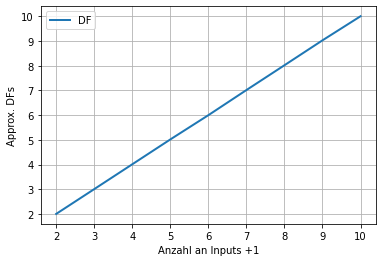

In [31]:
plt.plot(dfs_h1_gd_ln_u10.iloc[0], dfs_h1_gd_ln_u10.iloc[4], linewidth=2.0, label = 'DF')
plt.xlabel("Anzahl an Inputs +1")
plt.ylabel("Approx. DFs")
plt.grid()
plt.legend()
plt.show()


In [8]:
dfs_h1_gd_ln_u10

0          1          2          3          4  \
k (Inputs + Intercept)   2.000000   3.000000   4.000000   5.000000   6.000000   
Parameter               31.000000  41.000000  51.000000  61.000000  71.000000   
Forward Dif              1.979828   3.040195   4.089952   5.096197   6.046057   
Backward Dif             2.016068   2.964735   3.927350   4.935026   5.950689   
Centered Dif             1.997948   3.002465   4.008651   5.015612   5.998373   

                                5          6           7           8  
k (Inputs + Intercept)   7.000000   8.000000    9.000000   10.000000  
Parameter               81.000000  91.000000  101.000000  111.000000  
Forward Dif              7.184982   7.740498    8.926868   10.041714  
Backward Dif             6.847382   8.303165    9.136200    9.973049  
Centered Dif             7.016182   8.021832    9.031534   10.007381

In [9]:
dfs_h1_gd_ln_u20

0          1           2           3  \
k (Inputs + Intercept)   2.000000   3.000000    4.000000    5.000000   
Parameter               61.000000  81.000000  101.000000  121.000000   
Forward Dif              1.985669   2.992511    4.032612    4.985094   
Backward Dif             1.992822   3.025532    3.980637    5.047679   
Centered Dif             1.989245   3.009021    4.006624    5.016387   

                                 4           5           6           7  \
k (Inputs + Intercept)    6.000000    7.000000    8.000000    9.000000   
Parameter               141.000000  161.000000  181.000000  201.000000   
Forward Dif               6.029606    6.793976    7.972240    9.088993   
Backward Dif              5.993843    7.220745    8.055687    8.876801   
Centered Dif              6.011724    7.007360    8.013964    8.982897   

                                 8  
k (Inputs + Intercept)   10.000000  
Parameter               221.000000  
Forward Dif               9.813309  
Backward Dif             10.149002  
Centered Dif              9.981155

#### Ergebnis
- Schön zu sehen, dass die Anzahl der Parameter ( alle trainierbar ) scheinbar keinen Einfluss auf die Degrees of Freedom haben
- Anzahl von k, also Inputs + Intercept, hier näherungsgleich den berechneten Werten ist.

____


### Zwei Hidden Layer - mit 10 und 20 Hidden Units

In [11]:
dfs_h2_gd_ln_u10

0           1           2              3  \
k (Inputs + Intercept)    2.000000    3.000000    4.000000       5.000000   
Parameter               251.000000  261.000000  271.000000     281.000000   
Forward Dif               2.003312    2.942920    4.022479  122742.359375   
Backward Dif              1.999736    3.062129    3.978729 -131003.085938   
Centered Dif              2.001524    3.002524    4.000604   -4130.363281   

                                  4           5           6      7      8  
k (Inputs + Intercept)     6.000000    7.000000    8.000000    9.0   10.0  
Parameter                291.000000  301.000000  311.000000  321.0  331.0  
Forward Dif            -7391.178711    4.254103    9.781837    NaN    NaN  
Backward Dif            7554.641602   -4.507780    6.096363    NaN    NaN  
Centered Dif              81.731560   -0.126839    7.939100    NaN    NaN

In [12]:
dfs_h2_gd_ln_u20 

0           1           2           3  \
k (Inputs + Intercept)    2.000000    3.000000    4.000000    5.000000   
Parameter               901.000000  921.000000  941.000000  961.000000   
Forward Dif               2.003193    3.008723    3.993273    9.266853   
Backward Dif              2.006531    3.006101    3.998518    0.795603   
Centered Dif              2.004862    3.007412    3.995895    5.031228   

                                 4            5       6            7       8  
k (Inputs + Intercept)    6.000000     7.000000     8.0     9.000000    10.0  
Parameter               981.000000  1001.000000  1021.0  1041.000000  1061.0  
Forward Dif               5.982399     8.652687     NaN     7.540703     NaN  
Backward Dif              6.023884     5.436420     NaN    10.999680     NaN  
Centered Dif              6.003141     7.044554     NaN     9.270191     NaN

#### Ergebnis
- Wie bei den Berechnungen vorher zu sehen, scheint es keinen festen Zusammenhang zwischen Anzahl der Parameter und Degress of Freedom zu geben.
- Es war zu erwarten, dass es Probleme gibt bei den "großen" Netzen. 
  - Ich simuliere nur mit 750 Beobachtungen.
- **Todo:** Simulation mit 1500 oder 2000 Beobachtungen, auch versuchen die Simulation mit drei Hidden Layern zu nutzen.

____

## 2.2. Nur Output ist linear, rest ist Relu

### Ein Hidden Layer - mit 10 und 20 Hidden Units

In [13]:
dfs_h1_gd_relu_u10

0          1          2          3          4  \
k (Inputs + Intercept)   2.000000   3.000000   4.000000   5.000000   6.000000   
Parameter               31.000000  41.000000  51.000000  61.000000  71.000000   
Forward Dif              1.989484   3.944039   3.732443   5.535722   6.097317   
Backward Dif             2.023935   3.231645   4.344940   5.037665   6.302357   
Centered Dif             2.006710   3.587842   4.038692   5.286694   6.199837   

                                5          6           7           8  
k (Inputs + Intercept)   7.000000   8.000000    9.000000   10.000000  
Parameter               81.000000  91.000000  101.000000  111.000000  
Forward Dif              8.449793   8.838654    9.703636   10.478020  
Backward Dif             6.547689   8.314848    8.826256   11.003017  
Centered Dif             7.498741   8.576751    9.264946   10.740519

In [14]:
dfs_h1_gd_relu_u20

0          1           2           3  \
k (Inputs + Intercept)   2.000000   3.000000    4.000000    5.000000   
Parameter               61.000000  81.000000  101.000000  121.000000   
Forward Dif              1.989603   3.499866   15.713692    5.725503   
Backward Dif             2.016425   4.003048   -3.478646    4.849434   
Centered Dif             2.003014   3.751457    6.117523    5.287468   

                                 4           5           6           7  \
k (Inputs + Intercept)    6.000000    7.000000    8.000000    9.000000   
Parameter               141.000000  161.000000  181.000000  201.000000   
Forward Dif               9.343386    8.285761   10.117531    1.681328   
Backward Dif              6.968021   11.852026   10.561943   18.085480   
Centered Dif              8.155704   10.068893   10.339737    9.883404   

                                 8  
k (Inputs + Intercept)   10.000000  
Parameter               221.000000  
Forward Dif              11.386395  
Backward Dif             13.088226  
Centered Dif             12.237310

#### Anmerkungen
- Schön zu sehen, dass eine andere Aktivierungsfunktion wie relu keinen wirklichen Einfluss zu haben scheint.
- Wir sehen zwar stärkere Abweichungen bei den Modellen mit mehr Parameter (>160). Es wäre ein weiterer Punkt für größere Simulationen/andere Optimierer.

____

### Zwei Hidden Layer - mit 10 und 20 Hidden Units

In [15]:
dfs_h2_gd_relu_u10

0           1           2           3  \
k (Inputs + Intercept)    2.000000    3.000000    4.000000    5.000000   
Parameter               251.000000  261.000000  271.000000  281.000000   
Forward Dif               3.058076    2.962470    6.408334   47.094345   
Backward Dif              5.606651    3.685236    8.631825   -0.389337   
Centered Dif              4.332364    3.323853    7.520080   23.352505   

                                 4           5           6           7  \
k (Inputs + Intercept)    6.000000    7.000000    8.000000    9.000000   
Parameter               291.000000  301.000000  311.000000  321.000000   
Forward Dif              44.952393  179.297455 -260.077484    0.953674   
Backward Dif            -17.328739 -124.421600  259.850952    0.954628   
Centered Dif             13.811827   27.437925   -0.113249    0.954151   

                                 8  
k (Inputs + Intercept)   10.000000  
Parameter               331.000000  
Forward Dif            -229.208954  
Backward Dif            322.254211  
Centered Dif             46.522614

In [16]:
dfs_h2_gd_relu_u20

0           1           2           3  \
k (Inputs + Intercept)    2.000000    3.000000    4.000000    5.000000   
Parameter               901.000000  921.000000  941.000000  961.000000   
Forward Dif             -73.898552   48.836468   61.475754  146.001816   
Backward Dif             77.880142   20.809174  -48.149826 -132.322784   
Centered Dif              1.990795   34.822823    6.662965    6.839513   

                                 4            5            6            7  \
k (Inputs + Intercept)    6.000000     7.000000     8.000000     9.000000   
Parameter               981.000000  1001.000000  1021.000000  1041.000000   
Forward Dif              17.196178  -366.451721   450.444702   -29.964447   
Backward Dif             60.696121   294.612427  -363.952637    -2.802848   
Centered Dif             38.946152   -35.919666    43.246033   -16.383648   

                                  8  
k (Inputs + Intercept)    10.000000  
Parameter               1061.000000  
Forward Dif            -8220.847656  
Backward Dif            8014.977539  
Centered Dif            -102.935295

#### Anmerkungen
- hier gehen die Beobachtungen leider sehr aus einander. Wenn man sich die Ergebnisse der Modelle anschaut, scheint es eine mischung aus den folgenden Punkten zu sein:
  - Modelle sind nicht wirklich/Richtig konvergiert.
  - Dies ist zum teil zumindest der Optimierung zu geschrieben, da wir hier Gradient Descent nutzen.
  - Zum anderen haben wir sehr viele Parameter mit "nur" 750 Beobachtungen. Wieder ein Punkt für eine große Simulation.

_____

# 3. Sanity Check

Hier einfach die Differenz die benutzt worden ist verkleiner. Auch wenn diese in vorigen Simulationen nicht zu den "gewünschten" Ergebnissen geführt hat. Vielleicht helfen diese ja bei den komplexeren Modelle.

## Laden der Daten

### df_gd_h1e5_u10

In [13]:
df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u10/dfs_h0_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h0_gd_ln_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u10/dfs_forw_h1_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_ln_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u10/dfs_forw_h2_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_ln_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u10/dfs_forw_h1_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_relu_u10 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u10/dfs_forw_h2_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_relu_u10 = df


### df_gd_h1e5_u20

In [14]:
df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u20/dfs_h0_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h0_gd_ln_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u20/dfs_forw_h1_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_ln_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u20/dfs_forw_h2_gd_ln.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_ln_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u20/dfs_forw_h1_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h1_gd_relu_u20 = df

df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/server_sim_ergebnisse/df_gd_h1e5_u20/dfs_forw_h2_gd_relu.csv", header = None)
df.loc[0] += 1
df = df.rename(index={0:'k (Inputs + Intercept)', 1 : "Parameter", 2 : "Forward Dif", 3 : "Backward Dif", 4 : "Centered Dif"})
dfs_h2_gd_relu_u20 = df


## Nur Lineare Aktivierungsfunktionen

In [15]:
dfs_h0_gd_ln_u20

0         1         2         3         4  \
k (Inputs + Intercept)  2.000000  3.000000  4.000000  5.000000  6.000000   
Parameter               2.000000  3.000000  4.000000  5.000000  6.000000   
Forward Dif             0.095367  1.049042  2.360344  6.103516  6.437302   
Backward Dif            2.789497  2.276897  1.335144  2.837181  1.049042   
Centered Dif            1.442432  1.662970  1.847744  4.470348  3.743172   

                               5          6         7          8  
k (Inputs + Intercept)  7.000000   8.000000  9.000000  10.000000  
Parameter               7.000000   8.000000  9.000000  10.000000  
Forward Dif             4.768372  10.919571  8.201599  13.828278  
Backward Dif            6.771088   3.004074  5.722046  -8.106232  
Centered Dif            5.769730   6.961823  6.961823   2.861023

#### Anmerkungen
- Deckt sich mit den Ergebnissen
  - Größere Unterschiede sind auf die Probleme mit "zu kleinen" Differenzen zurückzuschreiben.


### Ein Hidden Layer - mit 10 und 20 Hidden Units

In [16]:
dfs_h1_gd_ln_u10

0          1          2          3          4  \
k (Inputs + Intercept)   2.000000   3.000000   4.000000   5.000000   6.000000   
Parameter               31.000000  41.000000  51.000000  61.000000  71.000000   
Forward Dif              2.235174   3.623962   7.724762  -0.250340   6.532669   
Backward Dif             1.734495   2.157688  -0.107288   9.417534   6.031990   
Centered Dif             1.984835   2.890825   3.808737   4.583597   6.282330   

                                5          6           7           8  
k (Inputs + Intercept)   7.000000   8.000000    9.000000   10.000000  
Parameter               81.000000  91.000000  101.000000  111.000000  
Forward Dif             -3.361702  14.352798    9.632111    6.484985  
Backward Dif            14.758110  -0.095367    1.764297   19.121170  
Centered Dif             5.698204   7.128716    5.698204   12.803078

In [17]:
dfs_h1_gd_ln_u20

0          1           2           3  \
k (Inputs + Intercept)   2.000000   3.000000    4.000000    5.000000   
Parameter               61.000000  81.000000  101.000000  121.000000   
Forward Dif             -0.357628   6.484985    2.586842    6.198883   
Backward Dif             4.768372  -2.610683    4.661083    4.720688   
Centered Dif             2.205372   1.937151    3.623962    5.459785   

                                 4           5           6           7  \
k (Inputs + Intercept)    6.000000    7.000000    8.000000    9.000000   
Parameter               141.000000  161.000000  181.000000  201.000000   
Forward Dif               0.977516    3.814697    6.580353   28.085709   
Backward Dif             11.396408   11.682510   10.967255   -9.012222   
Centered Dif              6.186962    7.748604    8.773804    9.536743   

                                 8  
k (Inputs + Intercept)   10.000000  
Parameter               221.000000  
Forward Dif              32.854080  
Backward Dif            -20.313263  
Centered Dif              6.270409

### Zwei Hidden Layer - mit 10 und 20 Hidden Units

In [18]:
dfs_h2_gd_ln_u20

0           1            2           3  \
k (Inputs + Intercept)    2.000000    3.000000     4.000000    5.000000   
Parameter               901.000000  921.000000   941.000000  961.000000   
Forward Dif               2.306700    3.266335 -4985.212891  -88.119507   
Backward Dif              2.086163    3.027916  5552.340332  106.012817   
Centered Dif              2.196431    3.147125   283.562866    8.946657   

                                 4             5            6       7       8  
k (Inputs + Intercept)    6.000000  7.000000e+00     8.000000     9.0    10.0  
Parameter               981.000000  1.001000e+03  1021.000000  1041.0  1061.0  
Forward Dif            -218.725204  1.901624e+06   -84.066391     NaN     NaN  
Backward Dif            231.742859 -2.050536e+06   116.729736     NaN     NaN  
Centered Dif              6.508827 -7.445605e+04    16.331673     NaN     NaN

In [19]:
dfs_h2_gd_ln_u20 

0           1            2           3  \
k (Inputs + Intercept)    2.000000    3.000000     4.000000    5.000000   
Parameter               901.000000  921.000000   941.000000  961.000000   
Forward Dif               2.306700    3.266335 -4985.212891  -88.119507   
Backward Dif              2.086163    3.027916  5552.340332  106.012817   
Centered Dif              2.196431    3.147125   283.562866    8.946657   

                                 4             5            6       7       8  
k (Inputs + Intercept)    6.000000  7.000000e+00     8.000000     9.0    10.0  
Parameter               981.000000  1.001000e+03  1021.000000  1041.0  1061.0  
Forward Dif            -218.725204  1.901624e+06   -84.066391     NaN     NaN  
Backward Dif            231.742859 -2.050536e+06   116.729736     NaN     NaN  
Centered Dif              6.508827 -7.445605e+04    16.331673     NaN     NaN

____

## Nur Output ist linear, rest ist Relu

### Ein Hidden Layer - mit 10 und 20 Hidden Units

In [20]:
dfs_h1_gd_relu_u10

0          1          2          3          4  \
k (Inputs + Intercept)   2.000000   3.000000   4.000000   5.000000   6.000000   
Parameter               31.000000  41.000000  51.000000  61.000000  71.000000   
Forward Dif              1.806021   6.842613  -1.657009 -10.275841  33.593178   
Backward Dif             2.264977  -0.751019   7.498264  22.196770 -18.668175   
Centered Dif             2.035499   3.045797   2.920628   5.960464   7.462502   

                                5          6           7           8  
k (Inputs + Intercept)   7.000000   8.000000    9.000000   10.000000  
Parameter               81.000000  91.000000  101.000000  111.000000  
Forward Dif             16.212463  12.731552   13.589859    7.963181  
Backward Dif             1.382828   2.670288    8.296967   13.494492  
Centered Dif             8.797646   7.700920   10.943413   10.728836

In [21]:
dfs_h1_gd_relu_u20

0          1           2           3  \
k (Inputs + Intercept)   2.000000   3.000000    4.000000    5.000000   
Parameter               61.000000  81.000000  101.000000  121.000000   
Forward Dif              0.822544   1.609325    9.846687    8.606911   
Backward Dif             3.647804   5.590916   -2.634525   -0.095367   
Centered Dif             2.235174   3.600121    3.606081    4.255772   

                                 4           5           6           7  \
k (Inputs + Intercept)    6.000000    7.000000    8.000000    9.000000   
Parameter               141.000000  161.000000  181.000000  201.000000   
Forward Dif               1.764297  -92.077255  -11.968613   17.929077   
Backward Dif              8.392334   92.983246   13.923645    5.865097   
Centered Dif              5.078316    0.452995    0.977516   11.897087   

                                 8  
k (Inputs + Intercept)   10.000000  
Parameter               221.000000  
Forward Dif              47.302246  
Backward Dif            -19.884109  
Centered Dif             13.709068

### Zwei Hidden Layer - mit 10 und 20 Hidden Units

In [22]:
dfs_h2_gd_relu_u10

0           1           2            3  \
k (Inputs + Intercept)    2.000000    3.000000    4.000000     5.000000   
Parameter               251.000000  261.000000  271.000000   281.000000   
Forward Dif            -276.446350    5.030632   11.277199 -7015.562500   
Backward Dif            402.235962    7.688999    4.315376  7252.430664   
Centered Dif             62.894825    6.359816    7.796288   118.434448   

                                 4           5           6              7  \
k (Inputs + Intercept)    6.000000    7.000000    8.000000       9.000000   
Parameter               291.000000  301.000000  311.000000     321.000000   
Forward Dif             256.013855  638.437256  716.638550  200675.875000   
Backward Dif            -71.954727 -745.105713 -616.550415 -196730.000000   
Centered Dif             92.029572  -53.334236   50.044060    1972.937622   

                            8  
k (Inputs + Intercept)   10.0  
Parameter               331.0  
Forward Dif               0.0  
Backward Dif              0.0  
Centered Dif              0.0

In [23]:
dfs_h2_gd_relu_u20

0           1            2             3  \
k (Inputs + Intercept)     2.000000    3.000000     4.000000      5.000000   
Parameter                901.000000  921.000000   941.000000    961.000000   
Forward Dif            -4696.523926  697.243164  -941.395752  -9932.994141   
Backward Dif            1670.777710 -866.973389  1064.038208  10261.583008   
Centered Dif           -1512.873291  -84.865097    61.321259    164.294250   

                                  4             5            6              7  \
k (Inputs + Intercept)     6.000000      7.000000     8.000000       9.000000   
Parameter                981.000000   1001.000000  1021.000000    1041.000000   
Forward Dif            -7634.163086   3697.443115 -5842.781250  -77126.796875   
Backward Dif            8924.866211 -10748.338867  7801.007812  107644.562500   
Centered Dif             645.351440  -3525.447998   979.113281   15258.883789   

                                    8  
k (Inputs + Intercept)      10.000000  
Parameter                 1061.000000  
Forward Dif            -167649.750000  
Backward Dif            130593.398438  
Centered Dif            -18528.175781